***
# WorldQuant University
<b>MScFE 610 Econometrics: Group Project 1 Submission</b><br>
***

<b>Group 11 Team Members:</b>

- Beh Min Yan
- Mohammadkian Maghsoodi
- Rahul Patil

# Question 5

<b>This notebook contains our worked solutions to Q5, including code, outputs, and short answers as to the interpretation of results.</b>

***

**Import Libraries & Relevant Datasets**

In [1]:
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np
import pandas as pd

pd.options.display.max_rows = 15
tnote_avg_yields_df = pd.read_csv('tnote_avg_yields.csv').set_index('index') # Import dataset from Question 3.1

# 5 Fitting the Yield Curve

<b>5.1) Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve.  Write out the equation.</b>

<u>Equation for Nelson-Siegel Curve:</u>

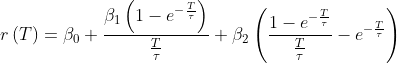

<b>5.2) Fit the Nielson-Siegel yield curve each day using the 6 benchmark yields for the October data</b>

In [2]:
tnote_avg_yields_df[['Oct 2019 Avg Yield']]

,Oct 2019 Avg Yield
index,
2 YR US T-Note,1.551364
3 YR US T-Note,1.528182
5 YR US T-Note,1.525000
7 YR US T-Note,1.615000
10 YR US T-Note,1.706818
30 YR US T-Note,2.190455


In [3]:
maturities = np.array([2, 3, 5, 7, 10, 30])  # Benchmark yield periods, in years
ns_curve_oct, _ = calibrate_ns_ols(maturities, tnote_avg_yields_df['Oct 2019 Avg Yield'])
ns_curve_oct

NelsonSiegelCurve(beta0=2.5349155085578663, beta1=-0.8131505073187899, beta2=-1.8864998896367546, tau=3.8431237793810236)

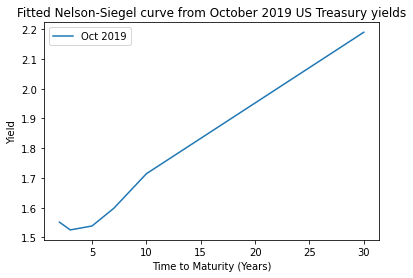

In [4]:
plt.plot(maturities, ns_curve_oct(maturities), label='Oct 2019')
plt.title('Fitted Nelson-Siegel curve from October 2019 US Treasury yields')
plt.ylabel('Yield')
plt.xlabel('Time to Maturity (Years)')
plt.legend()
plt.show()

<b>5.3) Fit the Nielson-Siegel yield curve each day using the 6 benchmark yields for the November data</b>

In [5]:
tnote_avg_yields_df[['Nov 2019 Avg Yield']]

,Nov 2019 Avg Yield
index,
2 YR US T-Note,1.612632
3 YR US T-Note,1.612105
5 YR US T-Note,1.639474
7 YR US T-Note,1.735789
10 YR US T-Note,1.812105
30 YR US T-Note,2.280526


In [6]:
ns_curve_nov, _ = calibrate_ns_ols(maturities, tnote_avg_yields_df['Nov 2019 Avg Yield'])
ns_curve_nov

NelsonSiegelCurve(beta0=2.654784412530737, beta1=-0.9992545760615046, beta2=-1.4350000104589598, tau=4.65424730553271)

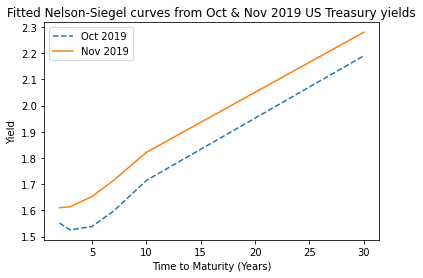

In [7]:
plt.plot(maturities, ns_curve_oct(maturities), linestyle='--', label='Oct 2019')
plt.plot(maturities, ns_curve_nov(maturities), label='Nov 2019')
plt.title('Fitted Nelson-Siegel curves from Oct & Nov 2019 US Treasury yields')
plt.ylabel('Yield')
plt.xlabel('Time to Maturity (Years)')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>5.4) What are the significant changes, if any?  Be specific with regards to the values of the parameters:</b> 

Comparing the two fitted curves, we see very similar patterns in beta1, beta2 and tau fitted values, which contribute to the very similar shape of both curves in terms of slope and curvature loadings. There is no significant change for this part, and understandably so because the Fed's decision came in a series of similar interest rate cuts, which has already been factored into the yield curve.
    
However, we can clearly see that the fitted Nov 2019 curve (in orange) has higher beta0 value, which leads to higher yields across all maturity periods compared to the fitted October 2019 curve (in blue). 
</div>